# Cálculo de proporciones de colocación

Este cuaderno desarrolla de forma automática, bajo el supuesto que la información ya ha sido cargado manualmente, el cálculo de proporciones de colocación diarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import chain, combinations

In [2]:
# Leer datos
# El archivo de metas son las metas para 2025 y el archivo de colocacion es un historico desde 2022
metas = pd.read_excel("../db/desgloce_metas.xlsx")
colocacion_diaria = pd.read_csv("../db/colocacion_diaria_historica.csv")
colocacion_diaria = colocacion_diaria[colocacion_diaria["BANCA"].isin(["BANCA TRABAJADORES", "BANCA PERSONAS"])]
trad_banca = {"BANCA PERSONAS": "PED", "BANCA TRABAJADORES": "BT"}
colocacion_diaria["BANCA"] = colocacion_diaria.apply(lambda x: trad_banca.get(x["BANCA"]), axis=1)
colocacion_diaria.dropna(subset="BANCA", inplace=True)

In [3]:
metas.head(3)

,FECHA,MES,TIPO DE CREDITO,TIPO DE CLIENTE,BANCA,TIPO PAGO,META
0,2025-01-31,ENERO,NUEVO,NUEVO,PED,REMESA,6.343552e+07
1,2025-01-31,ENERO,NUEVO,NUEVO,PED,PV,0.000000e+00
2,2025-01-31,ENERO,NUEVO,NUEVO,BT,PV,2.619744e+07


In [4]:
colocacion_diaria.head(3)

,FECHA_DESEMBOLSO,DIA,MES,TIPO_PAGO,BANCA,TIPO_CREDITO,TIPO_CLIENTE,MONTO_COLOCADO,NETO_COLOCADO
0,2022-01-04T00:00:00.0000000,3,1,REMESA,PED,RECREDITO,EXISTENTE,4710187.47,1876067.47
1,2022-01-04T00:00:00.0000000,3,1,REMESA,PED,NUEVO,REACTIVADO,315500.00,315500.00
2,2022-01-05T00:00:00.0000000,4,1,REMESA,PED,NUEVO,EXISTENTE,9500.00,9500.00


In [5]:
# Cambiar a formato de fecha ambas columnas de fecha en ambas tablas
colocacion_diaria["FECHA_DESEMBOLSO"] = pd.to_datetime(colocacion_diaria["FECHA_DESEMBOLSO"])
metas["FECHA"] = pd.to_datetime(metas["FECHA"])

In [6]:
colocacion_diaria.head(3)

,FECHA_DESEMBOLSO,DIA,MES,TIPO_PAGO,BANCA,TIPO_CREDITO,TIPO_CLIENTE,MONTO_COLOCADO,NETO_COLOCADO
0,2022-01-04,3,1,REMESA,PED,RECREDITO,EXISTENTE,4710187.47,1876067.47
1,2022-01-04,3,1,REMESA,PED,NUEVO,REACTIVADO,315500.00,315500.00
2,2022-01-05,4,1,REMESA,PED,NUEVO,EXISTENTE,9500.00,9500.00


In [7]:
metas.head(3)

,FECHA,MES,TIPO DE CREDITO,TIPO DE CLIENTE,BANCA,TIPO PAGO,META
0,2025-01-31,ENERO,NUEVO,NUEVO,PED,REMESA,6.343552e+07
1,2025-01-31,ENERO,NUEVO,NUEVO,PED,PV,0.000000e+00
2,2025-01-31,ENERO,NUEVO,NUEVO,BT,PV,2.619744e+07


In [7]:
# Encontrar el día del mes que era cada fecha en las metas
metas["MES"] = metas["FECHA"].dt.month
metas["DIA"] = metas["FECHA"].dt.day_of_week
colocacion_diaria["ANIO"] = colocacion_diaria["FECHA_DESEMBOLSO"].dt.year
metas.head(3)

,FECHA,MES,TIPO DE CREDITO,TIPO DE CLIENTE,BANCA,TIPO PAGO,META,DIA
0,2025-01-31,1,NUEVO,NUEVO,PED,REMESA,6.343552e+07,4
1,2025-01-31,1,NUEVO,NUEVO,PED,PV,0.000000e+00,4
2,2025-01-31,1,NUEVO,NUEVO,BT,PV,2.619744e+07,4


## Encontrar pesos del día de la semana

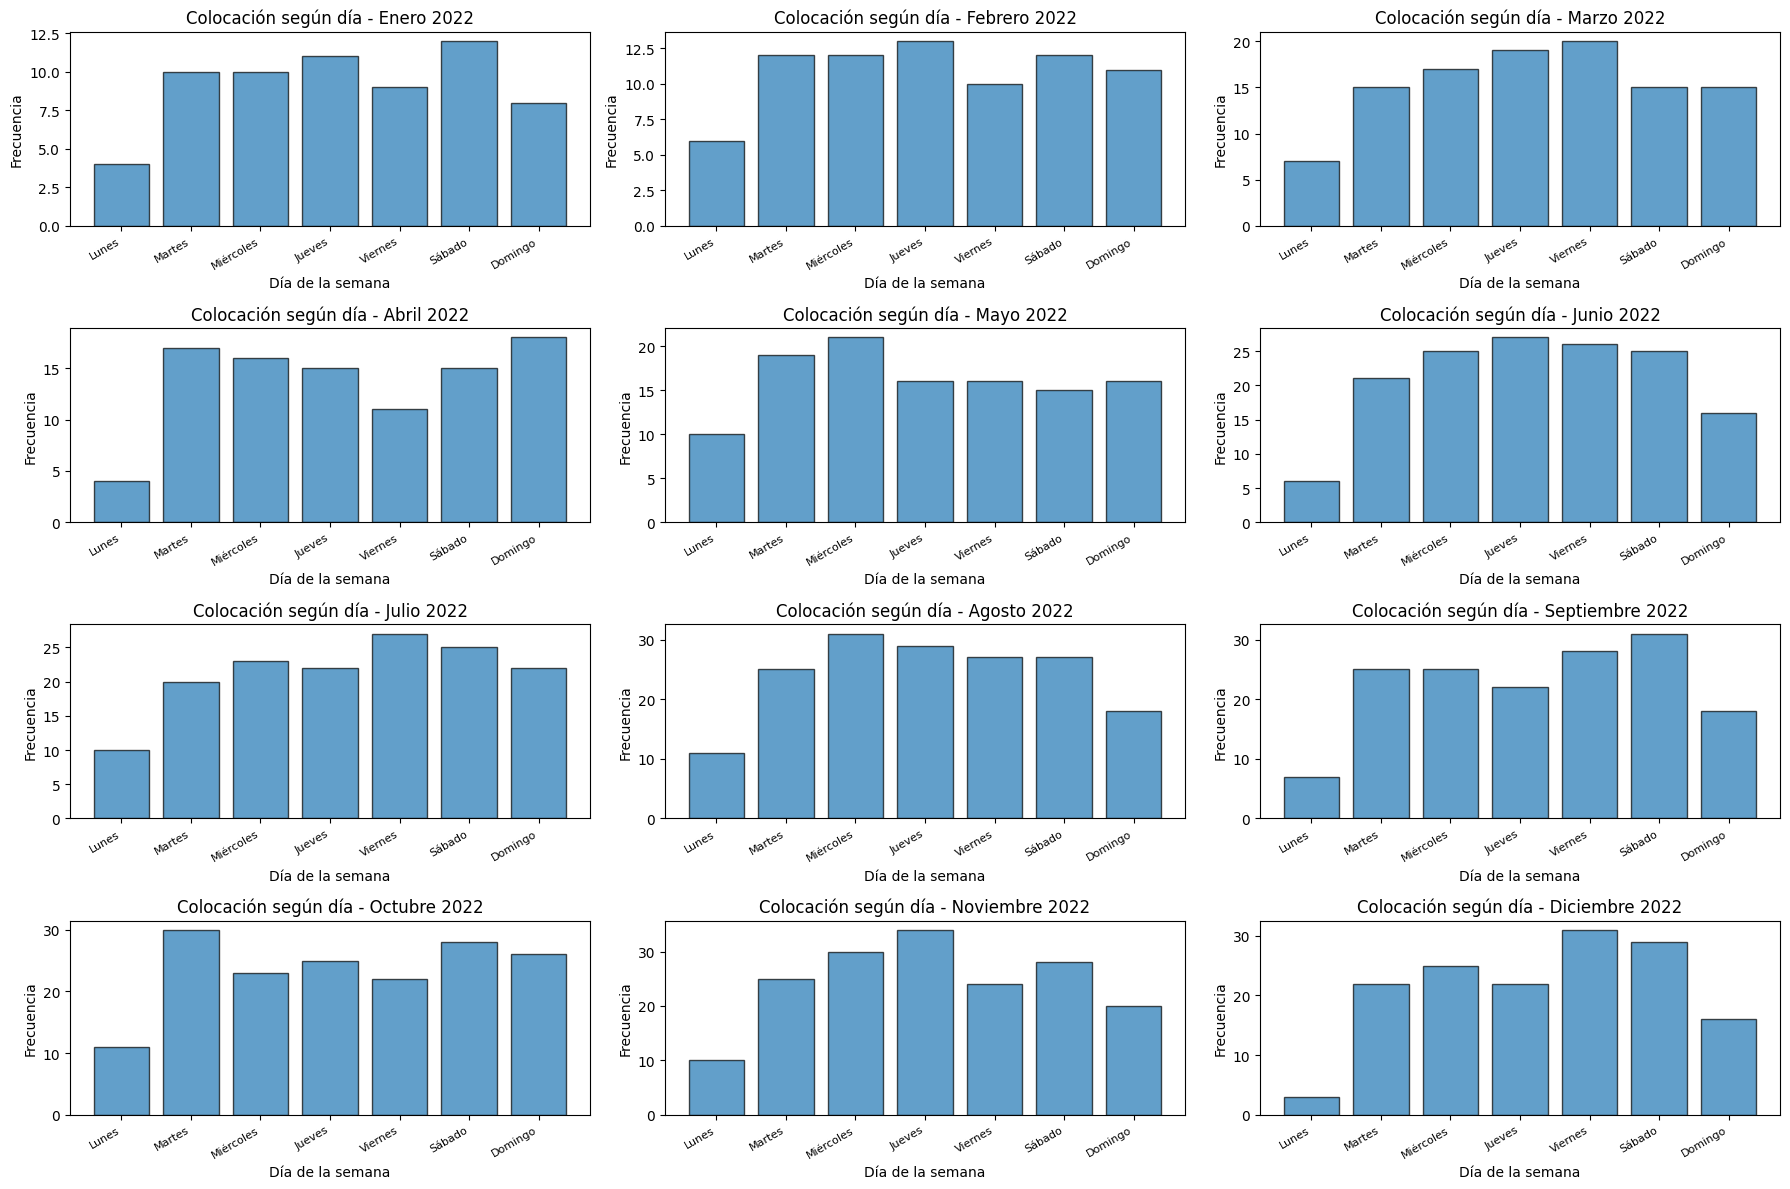

<Figure size 640x480 with 0 Axes>

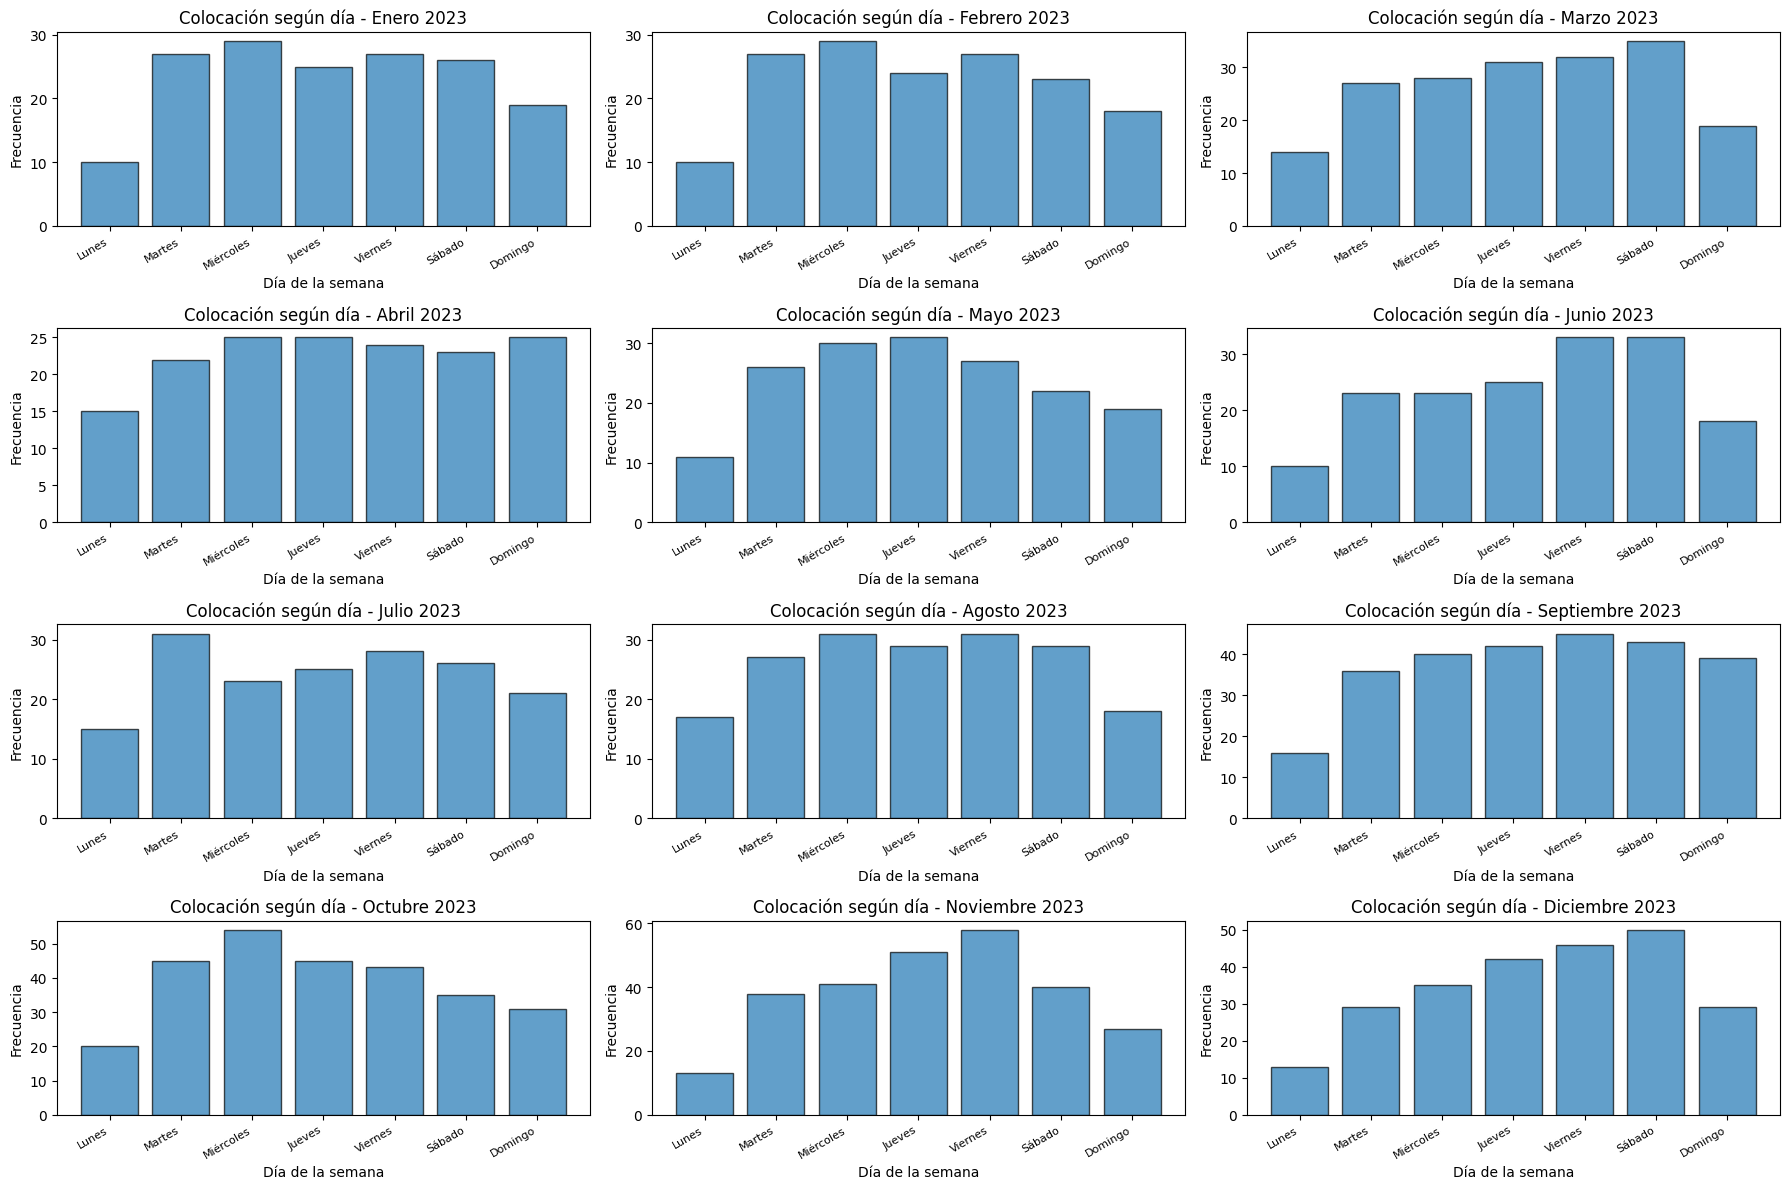

<Figure size 640x480 with 0 Axes>

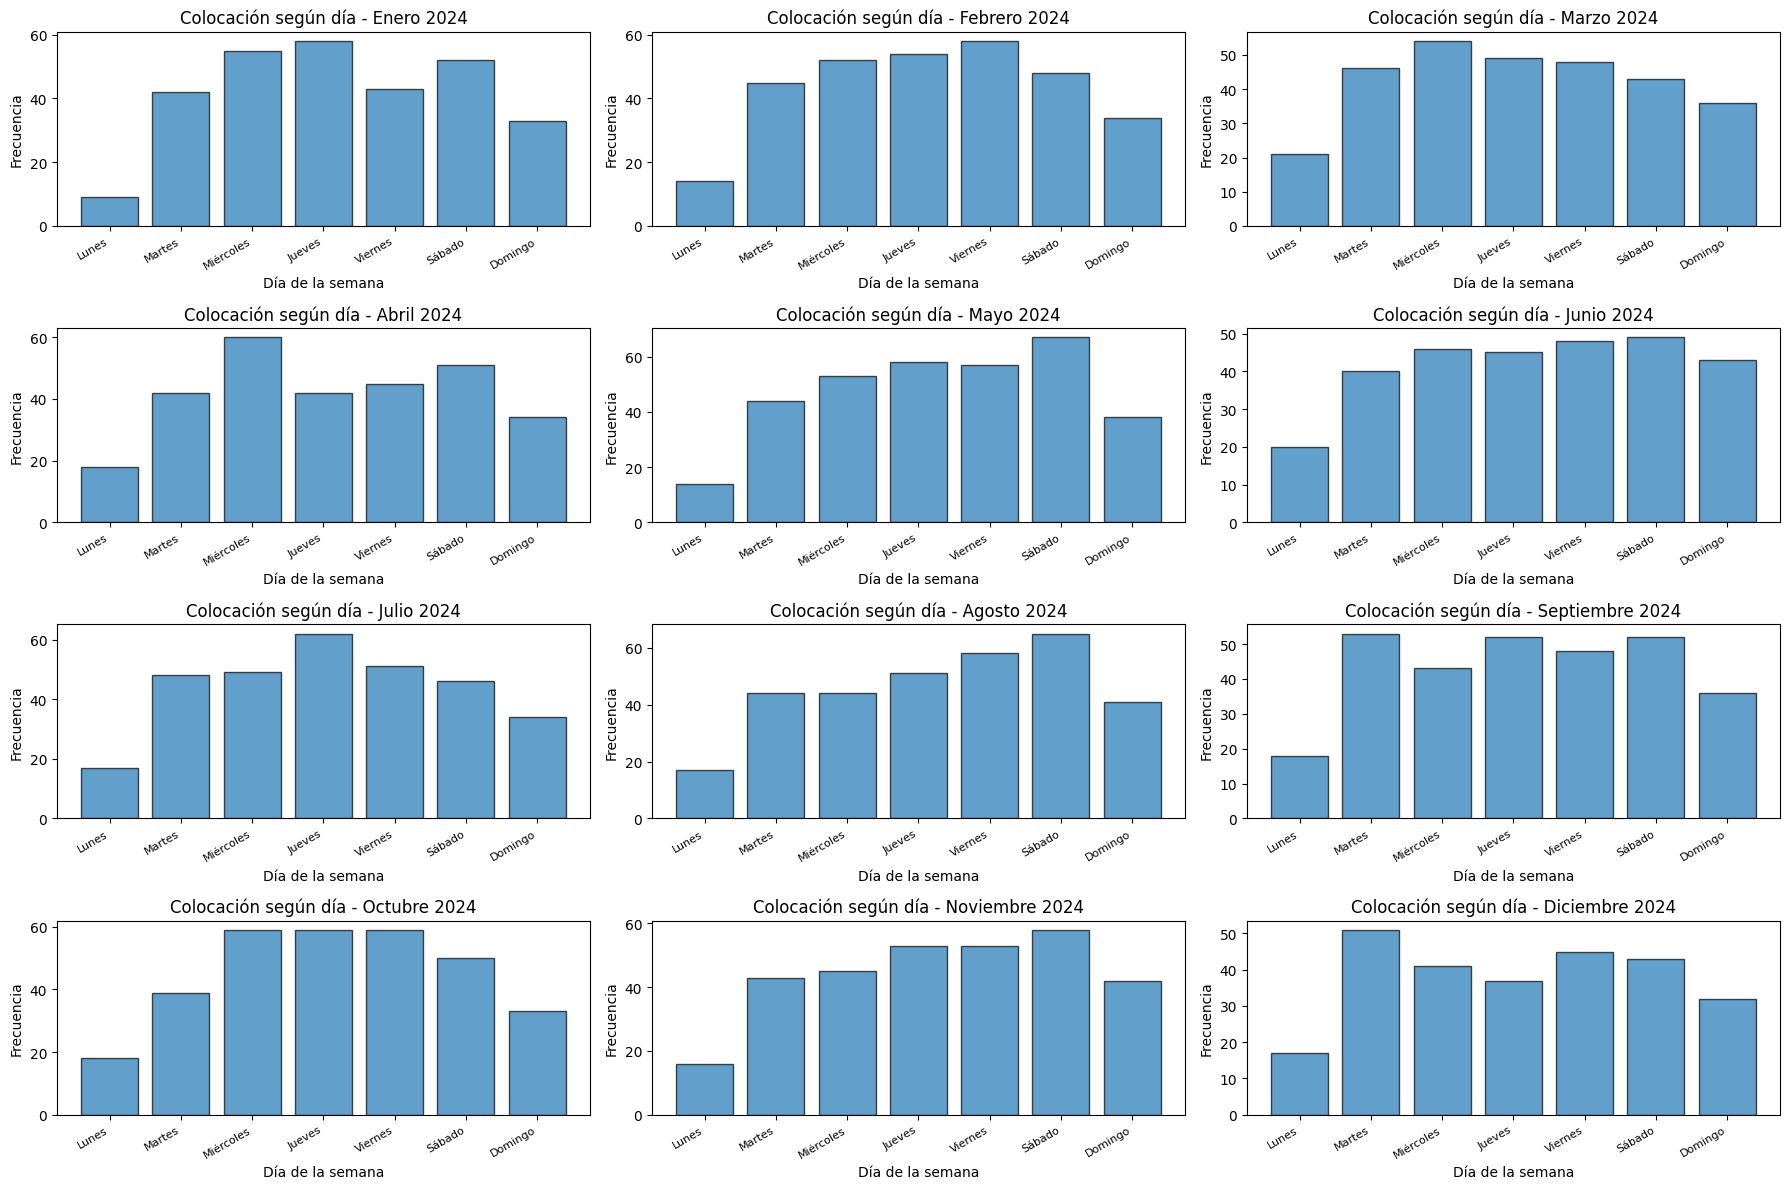

<Figure size 640x480 with 0 Axes>

In [8]:
dic_mes = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

dias_semana = {
    1: "Lunes",
    2: "Martes",
    3: "Miércoles",
    4: "Jueves",
    5: "Viernes",
    6: "Sábado",
    7: "Domingo"
}

for anio in colocacion_diaria["ANIO"].unique().tolist():
    fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # Aumentar el tamaño del gráfico
    axes = axes.flatten()

    for i, mes in enumerate(range(1, 13)):
        mascara_fecha = (colocacion_diaria["ANIO"] == anio) & (colocacion_diaria["MES"] == mes)
        data = colocacion_diaria.loc[mascara_fecha]

        if not data.empty:
            # Crear datos agrupados por día de la semana (1: Lunes, ..., 7: Domingo)
            frecuencias = data["DIA"].value_counts().reindex(range(1, 8), fill_value=0)

            # Crear el histograma con frecuencias reales
            axes[i].bar(range(1, 8), frecuencias, alpha=0.7, edgecolor="black")

            # Configurar el título
            axes[i].set_title(f"Colocación según día - {dic_mes.get(mes)} {anio}", fontsize=12)
            axes[i].set_xlabel("Día de la semana", fontsize=10)
            axes[i].set_ylabel("Frecuencia", fontsize=10)

            # Asignar los nombres de los días de la semana como etiquetas
            nombres_dias = [dias_semana.get(d, "") for d in range(1, 8)]
            axes[i].set_xticks(range(1, 8))
            axes[i].set_xticklabels(nombres_dias, rotation=30, ha="right", fontsize=8)
        else:
            axes[i].axis("off")  # Ocultar subplots vacíos

    # Ajustar los márgenes de los subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Espacio entre subplots
    plt.tight_layout()
    plt.show()
    plt.savefig(f"../db/Salidas/img/Colocación según día - {anio}.png")


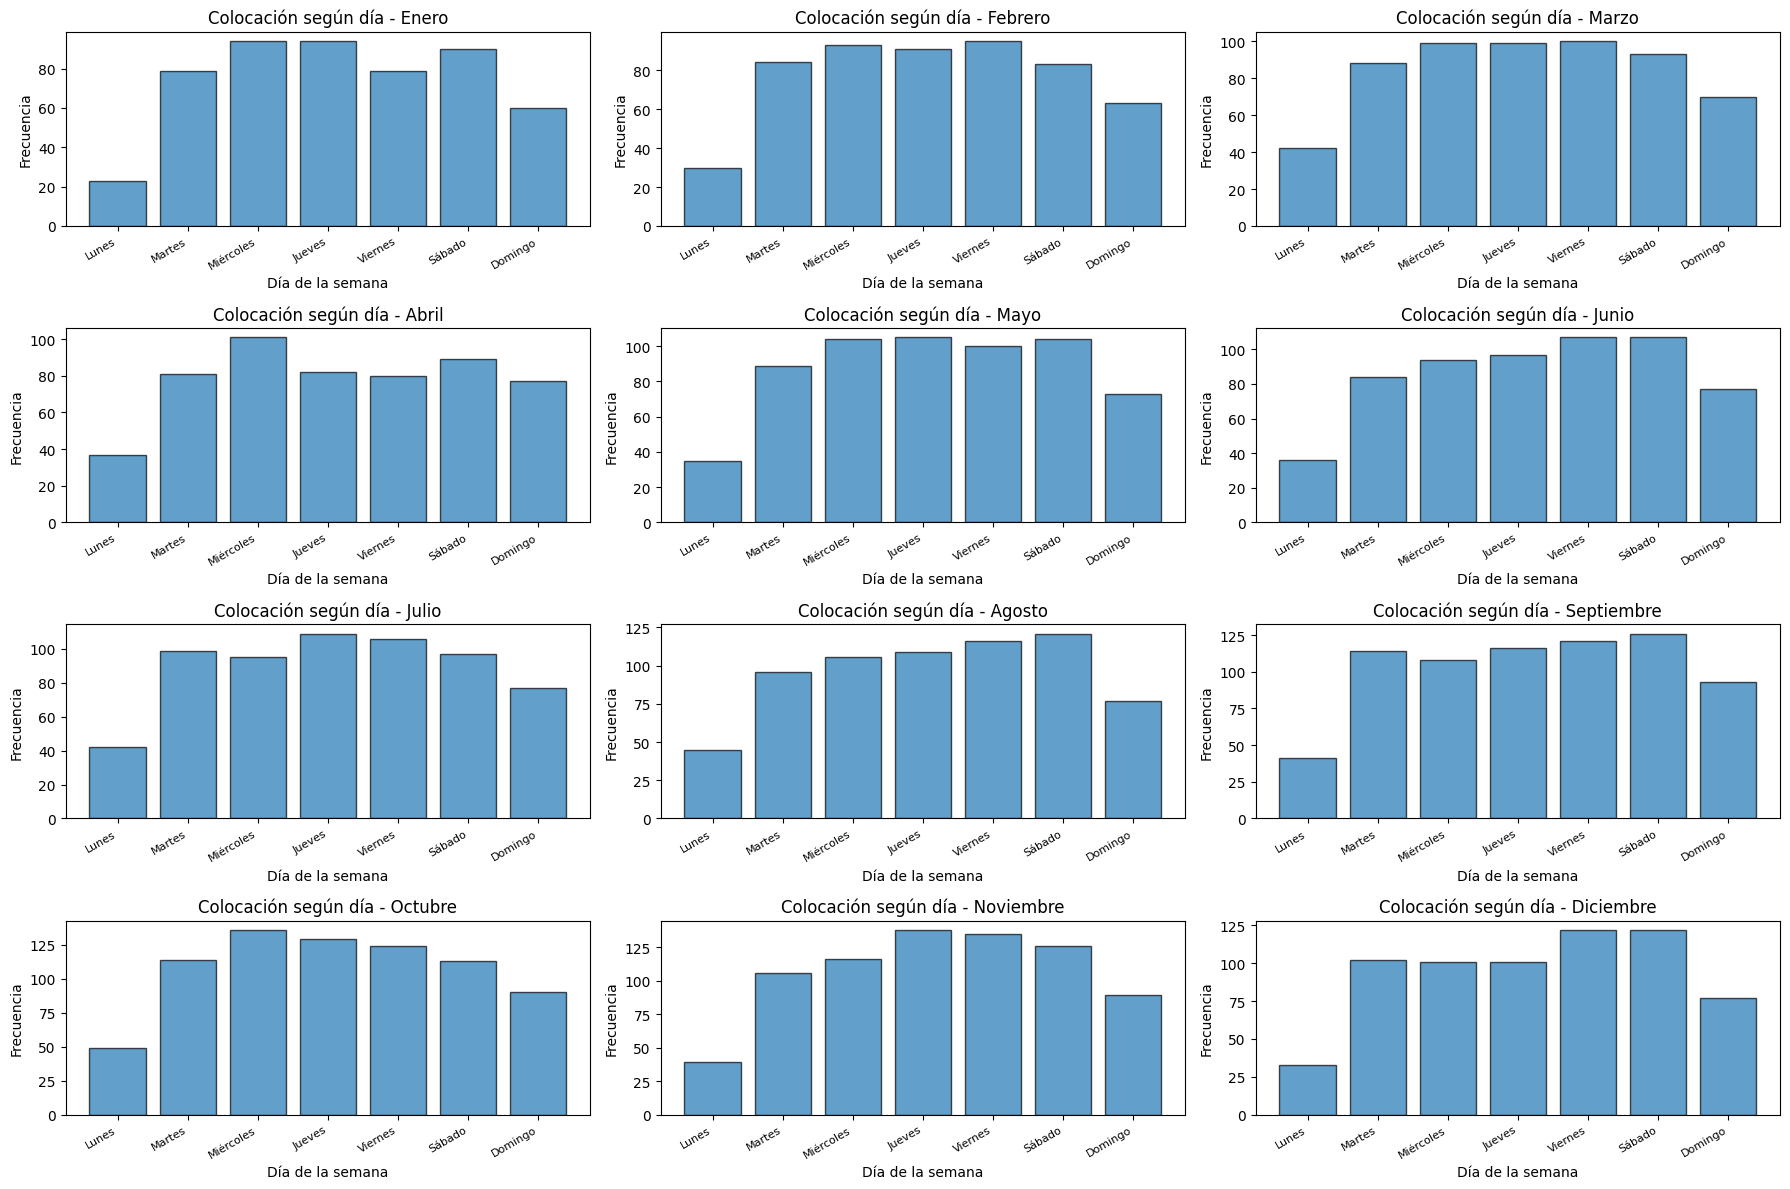

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # Aumentar el tamaño del gráfico
axes = axes.flatten()

for i, mes in enumerate(range(1, 13)):
    mascara_fecha = colocacion_diaria["MES"] == mes
    data = colocacion_diaria.loc[mascara_fecha]

    if not data.empty:
        # Crear datos agrupados por día de la semana (1: Lunes, ..., 7: Domingo)
        frecuencias = data["DIA"].value_counts().reindex(range(1, 8), fill_value=0)

        # Crear el histograma con frecuencias reales
        axes[i].bar(range(1, 8), frecuencias, alpha=0.7, edgecolor="black")

        # Configurar el título
        axes[i].set_title(f"Colocación según día - {dic_mes.get(mes)}", fontsize=12)
        axes[i].set_xlabel("Día de la semana", fontsize=10)
        axes[i].set_ylabel("Frecuencia", fontsize=10)

        # Asignar los nombres de los días de la semana como etiquetas
        nombres_dias = [dias_semana.get(d, "") for d in range(1, 8)]
        axes[i].set_xticks(range(1, 8))
        axes[i].set_xticklabels(nombres_dias, rotation=30, ha="right", fontsize=8)
    else:
        axes[i].axis("off")  # Ocultar subplots vacíos

# Ajustar los márgenes de los subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Espacio entre subplots
plt.tight_layout()
plt.show()
plt.savefig("../db/Salidas/img/Colocación según día - todos.png")


In [11]:
colocacion_diaria["TIPO_CREDITO"].unique()

array(['RECREDITO', 'NUEVO'], dtype=object)

In [12]:
filtros =  [
    ('REMESA', 'PED', 'NUEVO', 'NUEVO'),
    ('REMESA', 'PED', 'REACTIVADO', 'NUEVO'),
    ('REMESA', 'PED', 'EXISTENTE', 'NUEVO'),
    ('REMESA', 'BT', 'NUEVO', 'NUEVO'),
    ('REMESA', 'BT', 'REACTIVADO', 'NUEVO'),
    ('REMESA', 'BT', 'EXISTENTE', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'PED', 'NUEVO', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'PED', 'REACTIVADO', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'PED', 'EXISTENTE', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'BT', 'NUEVO', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'BT', 'REACTIVADO', 'NUEVO'),
    ('PAGO VOLUNTARIO', 'BT', 'EXISTENTE', 'NUEVO'),
    ('REMESA', 'PED', 'EXISTENTE', 'RECREDITO'),
    ('REMESA', 'BT', 'EXISTENTE', 'RECREDITO'),
    ('PAGO VOLUNTARIO', 'PED', 'EXISTENTE', 'RECREDITO'),
    ('PAGO VOLUNTARIO', 'BT', 'EXISTENTE', 'RECREDITO')
]

dfs = {}

# Generar un DataFrame para cada filtro
for tupla in filtros:
    # Filtrar el DataFrame para la tupla actual
    filtro = colocacion_diaria[
        (colocacion_diaria['TIPO_PAGO'] == tupla[0]) &
        (colocacion_diaria['BANCA'] == tupla[1]) &
        (colocacion_diaria['TIPO_CLIENTE'] == tupla[2]) &
        (colocacion_diaria['TIPO_CREDITO'] == tupla[3])
    ]
    # Guardar el DataFrame en el diccionario si no está vacío
    if not filtro.empty:
        key = f"{'_'.join(tupla)}"
        dfs[key] = filtro

In [13]:
resultados = []

for descripcion, df in zip(dfs.keys(), dfs.values()):
    try: 
        proporciones_anuales_mensuales = {}

        for anio in colocacion_diaria["ANIO"].unique():
            proporciones_anuales_mensuales[anio] = {}
            for mes in range(1, 13):  # Iterar por cada mes del año
                # Filtrar datos por año y mes
                data_filtrada = colocacion_diaria[(colocacion_diaria["ANIO"] == anio) & (colocacion_diaria["MES"] == mes)]

                if not data_filtrada.empty:
                    # Contar registros por día de la semana (1=Lunes, ..., 7=Domingo)
                    conteo_dias = data_filtrada["DIA"].value_counts().reindex(range(1, 8), fill_value=0)
                    
                    # Calcular proporciones
                    total_registros = len(data_filtrada)
                    proporciones = (conteo_dias / total_registros).to_dict()
                    
                    # Guardar las proporciones bajo el mes
                    proporciones_anuales_mensuales[anio][mes] = proporciones
                else:
                    # Si no hay datos para ese mes, guardar proporciones de 0
                    proporciones_anuales_mensuales[anio][mes] = {dia: 0 for dia in range(1, 8)}
        # Diccionario para almacenar las proporciones por mes considerando todos los años
        proporciones_mensuales = {}

        for mes in range(1, 13):  # Iterar por cada mes
            # Filtrar datos por mes
            data_filtrada = colocacion_diaria[colocacion_diaria["MES"] == mes]

            if not data_filtrada.empty:
                # Contar registros por día de la semana (1=Lunes, ..., 7=Domingo)
                conteo_dias = data_filtrada["DIA"].value_counts().reindex(range(1, 8), fill_value=0)

                # Calcular proporciones
                total_registros = len(data_filtrada)
                proporciones = (conteo_dias / total_registros).to_dict()

                # Guardar las proporciones bajo el mes
                proporciones_mensuales[mes] = proporciones
            else:
                # Si no hay datos para ese mes, guardar proporciones de 0
                proporciones_mensuales[mes] = {dia: 0 for dia in range(1, 8)}

        # Crear un DataFrame con todas las fechas del 2025
        start_date = datetime(2025, 1, 1)
        end_date = datetime(2025, 12, 31)
        dates_2025 = pd.date_range(start=start_date, end=end_date)

        df_2025 = pd.DataFrame({"FECHA": dates_2025})
        df_2025["MES"] = df_2025["FECHA"].dt.month
        df_2025["DIA"] = df_2025["FECHA"].dt.weekday + 1 

        # Calcular montos totales de desembolso histórico por mes y día de la semana
        desembolso_historico = colocacion_diaria.groupby(["MES", "DIA"])["MONTO_COLOCADO"].sum().reset_index()

        
        # Agregar las proporciones históricas (proporciones_mensuales) como peso
        desembolso_historico["PESO"] = desembolso_historico.apply(
            lambda row: proporciones_mensuales[row["MES"]][row["DIA"]], axis=1
        )

        # Calcular el promedio ponderado para cada mes y día de la semana
        desembolso_historico["PONDERADO"] = desembolso_historico["MONTO_COLOCADO"] * desembolso_historico["PESO"]

        # Crear un diccionario con los montos ponderados por mes y día de la semana
        ponderados_dict = desembolso_historico.groupby(["MES", "DIA"])["PONDERADO"].sum().to_dict()

        # Asignar los montos ponderados a cada fecha del 2025
        proporciones_estimadas_2025 = []

        for _, row in df_2025.iterrows():
            mes = row["MES"]
            dia = row["DIA"]

            # Obtener el monto ponderado para el día
            proporcion = ponderados_dict.get((mes, dia), 0)
            proporciones_estimadas_2025.append({"FECHA": row["FECHA"], "MES": mes, "DIA": dia, "PROPORCION": proporcion})

        # Crear un DataFrame con las proporciones estimadas
        df_proporciones_2025 = pd.DataFrame(proporciones_estimadas_2025)

        # Normalizar las proporciones por mes para que sumen 1
        df_proporciones_2025["SUMA_MES"] = df_proporciones_2025.groupby("MES")["PROPORCION"].transform("sum")
        df_proporciones_2025["PROPORCION_NORMALIZADA"] = df_proporciones_2025["PROPORCION"] / df_proporciones_2025["SUMA_MES"]

        # Resultado final: DataFrame con proporciones normalizadas
        df_proporciones_2025 = df_proporciones_2025[["FECHA", "MES", "DIA", "PROPORCION_NORMALIZADA"]]

        df_proporciones_2025.rename(columns={"DIA": "DIA_SEMANA",
                                            "PROPORCION_NORMALIZADA": "PORCENTAJE_PARTICIPACION"}, inplace=True)

        df_proporciones_2025["PORCENTAJE_PARTICIPACION"] = df_proporciones_2025["PORCENTAJE_PARTICIPACION"] * 100
        df_proporciones_2025["CLASIFICACION"] = descripcion
        resultados.append(df_proporciones_2025)
        
    except Exception as e:
        print(e)

## Pasar a formato útil

In [14]:
for i in range(len(resultados)):
    resultados[i][['TIPO_PAGO', 'BANCA', 'TIPO_CLIENTE', 'TIPO_CREDITO']] = resultados[i]['CLASIFICACION'].str.split('_', expand=True)

    # Eliminar la columna CLASIFICACION si ya no es necesaria
    resultados[i] = resultados[i].drop(columns=['CLASIFICACION'])
    resultados[i] = resultados[i][["FECHA", "TIPO_PAGO",  "TIPO_CLIENTE", "TIPO_CREDITO", 
                                "BANCA", "PORCENTAJE_PARTICIPACION"]]

In [15]:
resultado_final = pd.concat(resultados)
resultado_final["MES"] = resultado_final["FECHA"].dt.month
resultado_final.head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,PORCENTAJE_PARTICIPACION,MES
0,2025-01-01,REMESA,NUEVO,NUEVO,PED,4.879550,1
1,2025-01-02,REMESA,NUEVO,NUEVO,PED,4.971524,1
2,2025-01-03,REMESA,NUEVO,NUEVO,PED,3.381144,1


In [16]:
trad_pago = {"REMESA": "REMESA", "PV": "PAGO VOLUNTARIO"}
metas = metas[["FECHA", "TIPO PAGO", "TIPO DE CLIENTE", "TIPO DE CREDITO", "BANCA", "META", "MES"]]
# Asegúrate de que ambas tablas tienen los nombres de columnas consistentes
metas.rename(columns={"TIPO PAGO": "TIPO_PAGO", "TIPO DE CLIENTE": "TIPO_CLIENTE", 
                      "TIPO DE CREDITO": "TIPO_CREDITO"}, inplace=True)
metas["TIPO_PAGO"] = metas.apply(lambda x: trad_pago.get(x["TIPO_PAGO"]), axis=1)
metas.head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,META,MES
0,2025-01-31,REMESA,NUEVO,NUEVO,PED,6.343552e+07,1
1,2025-01-31,PAGO VOLUNTARIO,NUEVO,NUEVO,PED,0.000000e+00,1
2,2025-01-31,PAGO VOLUNTARIO,NUEVO,NUEVO,BT,2.619744e+07,1


In [17]:
metas[metas["TIPO_CREDITO"] == "RECREDITO"].head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,META,MES
12,2025-01-31,REMESA,EXISTENTE,RECREDITO,PED,1.573657e+08,1
13,2025-01-31,PAGO VOLUNTARIO,EXISTENTE,RECREDITO,PED,0.000000e+00,1
14,2025-01-31,PAGO VOLUNTARIO,EXISTENTE,RECREDITO,BT,9.049656e+05,1


In [18]:
resultado_final[resultado_final["TIPO_CREDITO"] == "RECREDITO"].head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,PORCENTAJE_PARTICIPACION,MES
0,2025-01-01,REMESA,EXISTENTE,RECREDITO,PED,4.879550,1
1,2025-01-02,REMESA,EXISTENTE,RECREDITO,PED,4.971524,1
2,2025-01-03,REMESA,EXISTENTE,RECREDITO,PED,3.381144,1


In [19]:
resultado_final = resultado_final.merge(
    metas[['TIPO_PAGO', 'BANCA', 'TIPO_CLIENTE', 'TIPO_CREDITO', 'META', "MES"]],
    on=['TIPO_PAGO', 'BANCA', 'TIPO_CLIENTE', 'TIPO_CREDITO', "MES"],
    how='left'  # Usamos left join para mantener todas las filas de resultado_final
)


In [20]:
resultado_final["META"] = resultado_final["META"].astype("float64")
resultado_final["DESEMBOLSO_DEL_DIA"] = resultado_final["META"] * resultado_final["PORCENTAJE_PARTICIPACION"] / 100
resultado_final.head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,PORCENTAJE_PARTICIPACION,MES,META,DESEMBOLSO_DEL_DIA
0,2025-01-01,REMESA,NUEVO,NUEVO,PED,4.879550,1,6.343552e+07,3.095368e+06
1,2025-01-02,REMESA,NUEVO,NUEVO,PED,4.971524,1,6.343552e+07,3.153712e+06
2,2025-01-03,REMESA,NUEVO,NUEVO,PED,3.381144,1,6.343552e+07,2.144846e+06


In [21]:
resultado_final.drop("MES", inplace=True, axis=1)
resultado_final.head(3)

,FECHA,TIPO_PAGO,TIPO_CLIENTE,TIPO_CREDITO,BANCA,PORCENTAJE_PARTICIPACION,META,DESEMBOLSO_DEL_DIA
0,2025-01-01,REMESA,NUEVO,NUEVO,PED,4.879550,6.343552e+07,3.095368e+06
1,2025-01-02,REMESA,NUEVO,NUEVO,PED,4.971524,6.343552e+07,3.153712e+06
2,2025-01-03,REMESA,NUEVO,NUEVO,PED,3.381144,6.343552e+07,2.144846e+06


In [22]:
resultado_final.drop("META", inplace=True, axis=1)
resultado_final.to_excel("../db/Salidas/Colocacion_diaria.xlsx")